conversion

In [12]:
import glob
import os
import pydub
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import librosa.display
import numpy as np

In [6]:
# convert from wav to mp3
wav_files = glob.glob('./*.wav')
for wav_file in wav_files:
    mp3_file = os.path.splitext(wav_file)[0] + '.mp3'
    sound = pydub.AudioSegment.from_wav(wav_file)
    sound.export(mp3_file, format="mp3")
    os.remove(wav_file)
print("Conversion Complete")

Conversion Complete
Conversion Complete


In [ ]:
# convert from mp3 to wav
mp3_files = glob.glob('data/*.mp3')
for mp3_file in mp3_files:
    wav_file = os.path.splitext(mp3_file)[0] + '.wav'
    sound = pydub.AudioSegment.from_mp3(mp3_file)
    sound.export(wav_file, format="wav")
    os.remove(mp3_file)
print("Conversion Complete")

In [25]:
# create spectrograms
def create_fold_spectrograms(fold):
    spectrogram_path = '/Users/gioelepozzi/Desktop/classification/spectrogram/' 
    audio_path = '/Users/gioelepozzi/Desktop/classification/data/' 
    print(f'Processing fold {fold}')
    os.mkdir(spectrogram_path/fold)
    for audio_file in list(Path(audio_path/f'fold{fold}').glob('*.wav')):
        samples, sample_rate = librosa.load(audio_file)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        filename  = spectrogram_path/fold/Path(audio_file).name.replace('.wav','.png')
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')

AttributeError: 'str' object has no attribute 'name'

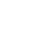

In [18]:
spectrogram_path = '/Users/gioelepozzi/Desktop/classification/spectrogram'
audio_path = '/Users/gioelepozzi/Desktop/classification/data/1.wav'

samples, sample_rate = librosa.load(audio_path)
fig = plt.figure(figsize=[0.72,0.72])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
filename  = (audio_path).name.replace('.wav','.png')
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
plt.close('all')


%for audio_file in audio_path.glob('*.wav'):
    